# **"Shirt Color Prediction Using YOLOv8"**

### The purpose of this notebook is to test the YOLOv8 model for shirt color prediction.

#### **Libraries Used:** 
>ultralytics

>matplotlib.pyplot

>cv2

#### **What is ultralytics library?**
>Ultralytics is a library for object detection, segmentation, and instance segmentation. It is used for image and video analysis.

#### **How to use?**

>1. Load the best weights of YOLOv8 model trained on the custom shirts data

>2. Store the predictions of model

>3. Using different scripts, test it on images, videos and live feed


# +_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+_+

## **Install ultralytics**

In [ ]:
%pip install ultralytics

## **Load the best weights of trained YOLO**

In [3]:
from ultralytics import YOLO

model = YOLO('X:/ML1/WEEK4/day4/runs_backup/detect/train/weights/best.pt')

## **Test model on image files**


image 1/1 c:\Users\PMLS\Desktop\ML1\WEEK4\day4\black_test.jpg: 640x448 1 black shirt, 200.9ms
Speed: 8.0ms preprocess, 200.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 448)


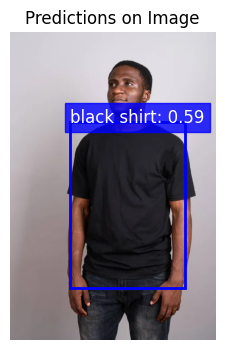

In [16]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO

# Load the image
image_path = 'black_test.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Make predictions
results = model.predict(source=image_path)

# Plot the image with predictions
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(image)
ax.axis('off')  # Hide axes
ax.set_title('Predictions on Image')

# Plot the bounding boxes and labels
for result in results:
    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        ax.add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='blue', linewidth=2))
        label = f"{result.names[int(box.cls[0])]}: {box.conf[0]:.2f}"
        ax.text(x1, y1, label, fontsize=12, color='white', bbox=dict(facecolor='blue', edgecolor='blue', alpha=0.8))

plt.show()

## **Test model on video files**

In [5]:
import cv2

# Load the video
video_path = 'blue_video_2.mp4'
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model.predict(source=frame)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]  # Get the bounding box coordinates
            conf = box.conf[0]  # Get the confidence
            cls = box.cls[0]  # Get the class

            # Draw the bounding box and label
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f'Class: {result.names[int(box.cls[0])]}, Conf: {conf:.2f}', (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with predictions
    cv2.imshow('Video Predictions', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 640x384 1 blue shirt, 139.7ms
Speed: 7.1ms preprocess, 139.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 60.8ms
Speed: 2.0ms preprocess, 60.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 81.2ms
Speed: 20.0ms preprocess, 81.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 79.6ms
Speed: 2.0ms preprocess, 79.6ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 100.0ms
Speed: 3.0ms preprocess, 100.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 74.2ms
Speed: 1.5ms preprocess, 74.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 67.5ms
Speed: 0.9ms preprocess, 67.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 blue shirt, 71.2ms
Speed: 2.0ms preprocess, 71.2ms inference, 1.6ms pos

#### Video Results:

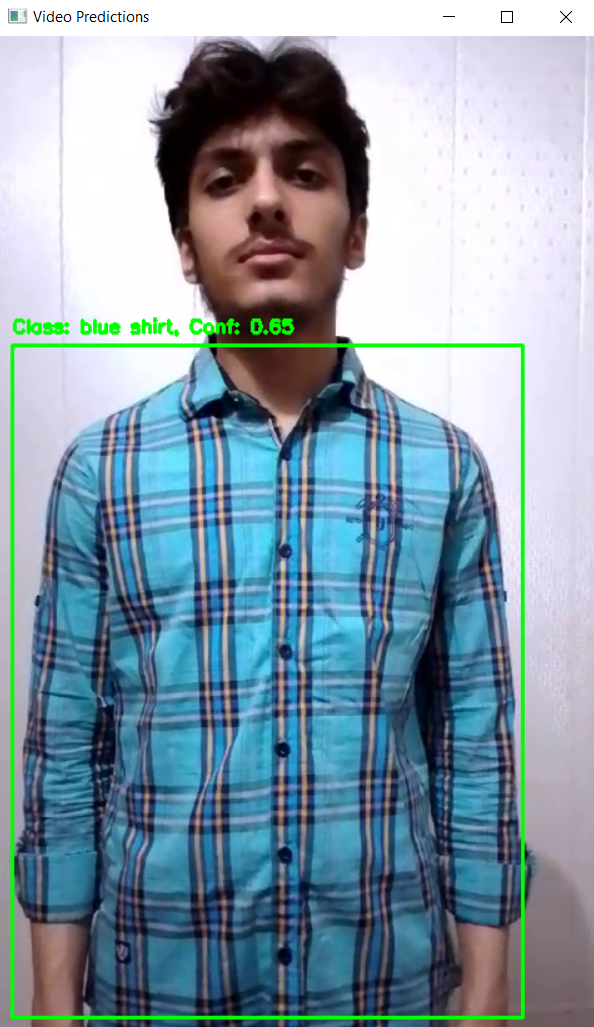

## **Test model on live camera**

In [4]:
import cv2

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make predictions
    results = model.predict(source=frame)

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]  # Get the bounding box coordinates
            conf = box.conf[0]  # Get the confidence
            cls = box.cls[0]  # Get the class

            # Draw the bounding box and label
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(frame, f'Class: {result.names[int(box.cls[0])]}, Conf: {conf:.2f}', (int(x1), int(y1) - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Display the frame with predictions
    cv2.imshow('Video Predictions', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 241.5ms
Speed: 12.5ms preprocess, 241.5ms inference, 9.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.4ms
Speed: 4.0ms preprocess, 100.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.4ms
Speed: 3.0ms preprocess, 84.4ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 81.6ms
Speed: 2.0ms preprocess, 81.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.3ms
Speed: 2.0ms preprocess, 93.3ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 97.6ms
Speed: 1.6ms preprocess, 97.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.0ms
Speed: 2.5ms preprocess, 100.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 100.0ms
Speed: 2.0ms preprocess, 